In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox,zscore
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,roc_auc_score,f1_score,recall_score,roc_curve,auc,precision_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostClassifier,AdaBoostRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
import joblib as joblib

from pandas.api.types import is_string_dtype,is_numeric_dtype

In [368]:
 
df=pd.read_csv('Skyserver.csv')
pd.options.display.float_format = '{:.2f}'.format
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237650000000000000.00,183.53,0.09,19.47,17.04,15.95,15.50,15.23,752,301,4,267,3722360000000000000.00,STAR,-0.00,3306,54922,491
1,1237650000000000000.00,183.60,0.14,18.66,17.21,16.68,16.49,16.39,752,301,4,267,363814000000000000.00,STAR,-0.00,323,51615,541
2,1237650000000000000.00,183.68,0.13,19.38,18.19,17.47,17.09,16.80,752,301,4,268,323274000000000000.00,GALAXY,0.12,287,52023,513
3,1237650000000000000.00,183.87,0.05,17.77,16.60,16.16,15.98,15.90,752,301,4,269,3722370000000000000.00,STAR,-0.00,3306,54922,510
4,1237650000000000000.00,183.88,0.10,17.55,16.26,16.44,16.55,16.61,752,301,4,269,3722370000000000000.00,STAR,0.00,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1237650000000000000.00,131.32,51.54,18.82,17.47,16.92,16.68,16.51,1345,301,3,161,503345000000000000.00,GALAXY,0.03,447,51877,246
9996,1237650000000000000.00,131.31,51.67,18.27,17.44,17.08,16.72,16.70,1345,301,3,162,503340000000000000.00,GALAXY,0.12,447,51877,228
9997,1237650000000000000.00,131.55,51.67,18.76,17.78,17.52,17.43,17.42,1345,301,3,162,8222620000000000000.00,STAR,-0.00,7303,57013,622
9998,1237650000000000000.00,131.48,51.75,18.88,17.91,17.53,17.36,17.14,1345,301,3,163,503340000000000000.00,GALAXY,0.01,447,51877,229


In [369]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [370]:
#convert string data to int
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

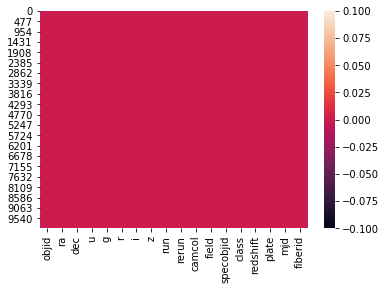

In [371]:
sns.heatmap(data=df.isnull())

In [372]:
#no missing values


In [373]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,1237649999999842304.00,175.53,14.84,18.62,17.37,16.84,16.58,16.42,981.03,301.00,3.65,302.38,1645021569800003584.00,0.92,0.14,1460.99,52943.53,353.07
std,157703.89,47.78,25.21,0.83,0.95,1.07,1.14,1.20,273.31,0.00,1.67,162.58,2013998492866906624.00,0.95,0.39,1788.78,1511.15,206.30
min,1237650000000000000.00,8.24,-5.38,12.99,12.80,12.43,11.95,11.61,308.00,301.00,1.00,11.00,299578000000000000.00,0.00,-0.00,266.00,51578.00,1.00
25%,1237650000000000000.00,157.37,-0.54,18.18,16.82,16.17,15.85,15.62,752.00,301.00,2.00,184.00,338924750000000000.00,0.00,0.00,301.00,51900.00,186.75
50%,1237650000000000000.00,180.39,0.40,18.85,17.50,16.86,16.55,16.39,756.00,301.00,4.00,299.00,496658000000000000.00,1.00,0.04,441.00,51997.00,351.00
75%,1237650000000000000.00,201.55,35.65,19.26,18.01,17.51,17.26,17.14,1331.00,301.00,5.00,414.00,2881300000000000000.00,2.00,0.09,2559.00,54468.00,510.00
max,1237650000000000000.00,260.88,68.54,19.60,19.92,24.80,28.18,22.83,1412.00,301.00,6.00,768.00,9468830000000000000.00,2.00,5.35,8410.00,57481.00,1000.00


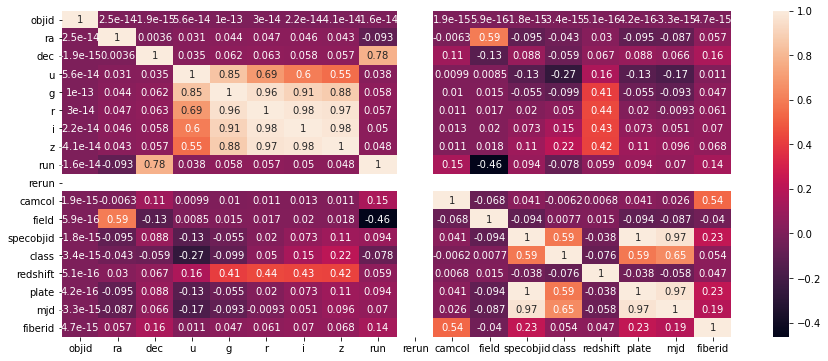

In [374]:
#dec,run,specobjid,fiberid,mjd,plate columns have skewed data
#fiberid,plate,field,z column have outliers .
corr_=df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(data=corr_,annot=True)

In [375]:
#drop rerun column
df=df.drop('rerun',axis=1)


In [376]:
corr_
col1_=[]
col2_=[]
correl_=[]
#find columns having corelation >0.9
for index_ in corr_.index:
    for col in corr_.columns:
        if(col!='class'):
            if(index_==col):
               pass 
            else:
                if(abs(corr_[col][index_])>=0.98):
                    col1_.append(index_)
                    col2_.append(col)
                    correl_.append(corr_[col][index_])

In [377]:
df_corr=pd.DataFrame({'column1':col1_,'column2':col2_,'correlation':correl_})

df_corr    

,column1,column2,correlation
0,i,z,0.98
1,z,i,0.98
2,specobjid,plate,1.00
3,plate,specobjid,1.00


In [378]:
df=df.drop(['i','specobjid'],axis=1)

In [379]:
df.shape

(10000, 15)

In [380]:

#Lets print unique values for each column
for col in df.columns:
    print("***************",col,"************")
    print(df[col].value_counts())
    print('\n')


*************** objid ************
1237650000000000000.00    10000
Name: objid, dtype: int64


*************** ra ************
226.51    1
186.86    1
162.41    1
242.42    1
25.77     1
         ..
218.43    1
179.37    1
187.11    1
235.91    1
182.37    1
Name: ra, Length: 10000, dtype: int64


*************** dec ************
0.70     1
0.03     1
0.32     1
-0.73    1
60.96    1
        ..
-0.05    1
0.32     1
-3.51    1
57.64    1
0.66     1
Name: dec, Length: 10000, dtype: int64


*************** u ************
18.90    3
19.00    3
18.98    3
19.54    3
19.56    3
        ..
19.28    1
19.52    1
18.24    1
18.48    1
18.77    1
Name: u, Length: 9730, dtype: int64


*************** g ************
17.56    3
17.75    3
17.61    3
18.32    3
17.54    2
        ..
16.79    1
18.01    1
16.94    1
17.69    1
17.88    1
Name: g, Length: 9817, dtype: int64


*************** r ************
16.00    3
16.49    3
16.71    2
17.21    2
16.28    2
        ..
19.18    1
16.03    1
16.27  

In [381]:
#drop objid column as it has same value which will not be not helpfull for machine learning
df=df.drop('objid',axis=1)
df

,ra,dec,u,g,r,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.53,0.09,19.47,17.04,15.95,15.23,752,4,267,2,-0.00,3306,54922,491
1,183.60,0.14,18.66,17.21,16.68,16.39,752,4,267,2,-0.00,323,51615,541
2,183.68,0.13,19.38,18.19,17.47,16.80,752,4,268,0,0.12,287,52023,513
3,183.87,0.05,17.77,16.60,16.16,15.90,752,4,269,2,-0.00,3306,54922,510
4,183.88,0.10,17.55,16.26,16.44,16.61,752,4,269,2,0.00,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.32,51.54,18.82,17.47,16.92,16.51,1345,3,161,0,0.03,447,51877,246
9996,131.31,51.67,18.27,17.44,17.08,16.70,1345,3,162,0,0.12,447,51877,228
9997,131.55,51.67,18.76,17.78,17.52,17.42,1345,3,162,2,-0.00,7303,57013,622
9998,131.48,51.75,18.88,17.91,17.53,17.14,1345,3,163,0,0.01,447,51877,229


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC59563610>,
      dtype=object)

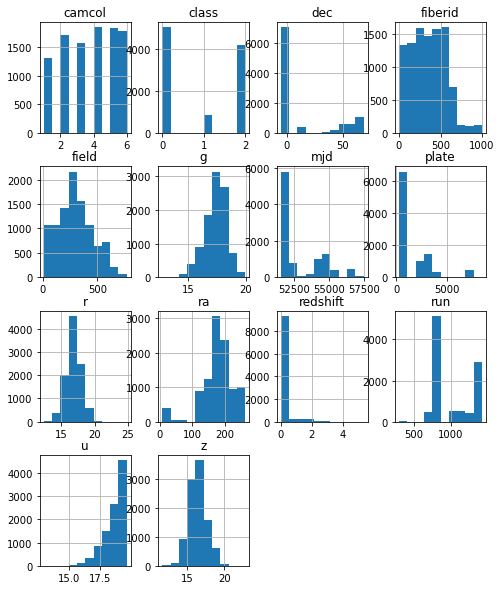

In [382]:
df.hist(figsize=(8,10))

In [383]:
#u,plate,mjd colum having skewed data
df.skew()

ra         -1.23
dec         1.19
u          -1.22
g          -0.54
r          -0.02
z           0.21
run         0.41
camcol     -0.10
field       0.25
class       0.17
redshift    4.27
plate       1.79
mjd         1.04
fiberid     0.31
dtype: float64

In [384]:
#remove skewed data
#remove skewed removing all dataset after removing outlier so not removing skewed data
#for col in df.columns:
 #   if(df[col].skew()>0.55):
  #      df[col]=np.log1p(df[col])

ra             AxesSubplot(0.125,0.749828;0.227941x0.130172)
dec         AxesSubplot(0.398529,0.749828;0.227941x0.130172)
u           AxesSubplot(0.672059,0.749828;0.227941x0.130172)
g              AxesSubplot(0.125,0.593621;0.227941x0.130172)
r           AxesSubplot(0.398529,0.593621;0.227941x0.130172)
z           AxesSubplot(0.672059,0.593621;0.227941x0.130172)
run            AxesSubplot(0.125,0.437414;0.227941x0.130172)
camcol      AxesSubplot(0.398529,0.437414;0.227941x0.130172)
field       AxesSubplot(0.672059,0.437414;0.227941x0.130172)
class          AxesSubplot(0.125,0.281207;0.227941x0.130172)
redshift    AxesSubplot(0.398529,0.281207;0.227941x0.130172)
plate       AxesSubplot(0.672059,0.281207;0.227941x0.130172)
mjd               AxesSubplot(0.125,0.125;0.227941x0.130172)
fiberid        AxesSubplot(0.398529,0.125;0.227941x0.130172)
dtype: object

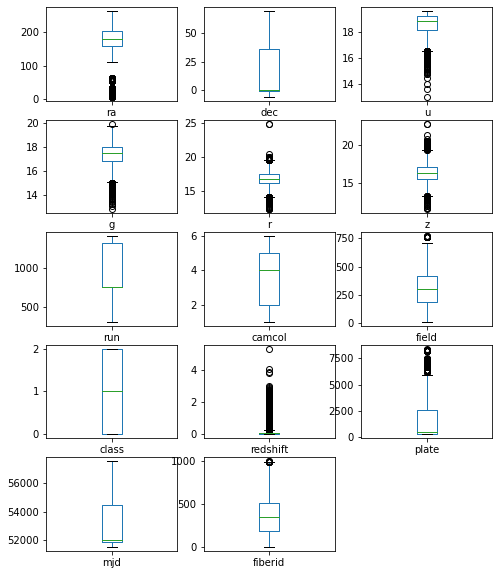

In [386]:
df.plot.box(subplots=True,layout=(5,3),figsize=(8,10))

In [387]:
#outliers present in ra,r,g,z,redshift,plate columns
#removing outlier
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape

(8701, 14)

In [388]:
x=df.drop('class',axis=1)
y=df['class']
print(x.shape,y.shape)

(8701, 13) (8701,)


In [389]:
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

array([[ 0.0223328 , -0.56325991,  1.07613746, ...,  1.63795049,
         1.66775559,  0.75470452],
       [ 0.02419069, -0.56146814,  0.03946042, ..., -0.65923933,
        -0.88359223,  1.01653089],
       [ 0.02645847, -0.56182577,  0.95974994, ..., -0.68696271,
        -0.56882056,  0.86990812],
       ...,
       [-1.42488329,  1.46390387, -0.4592246 , ..., -0.5637477 ,
        -0.68145945, -0.62250221],
       [-1.4201428 ,  1.46711576,  0.32067916, ..., -0.5637477 ,
        -0.68145945, -0.61726568],
       [-1.41493698,  1.46916879,  0.82286553, ..., -0.5637477 ,
        -0.68145945, -0.59631957]])

In [390]:
def findBestParam(reg_obj,param_arr):
    grid_cv=GridSearchCV(reg_obj,param_arr,cv=10)
    grid_cv.fit(x,y)
    return grid_cv.best_params_

In [392]:
params_={'kernel':['linear','rbf','poly']}
svr=SVC()
print("dtree_reg best param :",findBestParam(svr,params_))

dtree_reg best param : {'kernel': 'linear'}


In [393]:
params_={'criterion':['gini','entropy'],'max_depth':[2,5,10]}
dtree_reg=DecisionTreeClassifier()
print("dtree_reg best param :",findBestParam(dtree_reg,params_))


dtree_reg best param : {'criterion': 'entropy', 'max_depth': 5}


In [394]:
params_={'n_neighbors':[5,10,15,20]}
kn_reg=KNeighborsClassifier()
print("kn_reg best param :",findBestParam(kn_reg,params_))


kn_reg best param : {'n_neighbors': 5}


In [395]:
params_={'alpha':[0.0001,0.001,0.01,0.1,1.0],'penalty':['l1','l2','elasticnet']}
sgd_reg=SGDClassifier()
print("sgd_reg best param :",findBestParam(sgd_reg,params_))

sgd_reg best param : {'alpha': 0.0001, 'penalty': 'l1'}


In [396]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0]}
gradient_reg=GradientBoostingClassifier()
print("gradient_reg best param :",findBestParam(gradient_reg,params_))

gradient_reg best param : {'learning_rate': 0.1}


In [397]:
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0],'base_estimator':[dtree_reg,kn_reg,sgd_reg]}
ada_reg=AdaBoostClassifier()
print("ada_reg best param :",findBestParam(ada_reg,params_))


ada_reg best param : {'base_estimator': DecisionTreeClassifier(), 'learning_rate': 0.0001}


In [398]:
params_={'n_estimators':[10,50,100,150,200],'max_depth':[2,5,10,15],'criterion':['gini','entropy']}
rand_reg=RandomForestClassifier()
print("rand_reg best param :",findBestParam(rand_reg,params_))

rand_reg best param : {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}


In [399]:
lr_reg=LogisticRegression()
mul_nb=MultinomialNB()
gaus_nb=GaussianNB()
svr=SVC(kernel='linear')
dtree_reg=DecisionTreeClassifier(criterion='entropy',max_depth=5)
kn_reg=KNeighborsClassifier(n_neighbors=5)
sgd_reg=SGDClassifier(alpha=0.0001,penalty='l1')
gradient_reg=GradientBoostingClassifier(learning_rate=0.1)
ada_reg=AdaBoostClassifier(learning_rate=0.0001,base_estimator=dtree_reg)
rand_reg=RandomForestClassifier(n_estimators=50,max_depth=10,criterion='gini')

In [400]:
models=[]
models.append(('LogisticRegression',lr_reg))
models.append(('SVC',svr))
models.append(('DecisionTreeClassifier',dtree_reg))
models.append(('KNeighborsClassifier',kn_reg))
models.append(('SGDClassifier',sgd_reg))
models.append(('GaussianNB',gaus_nb))
#models.append(('MultinomialNB',mul_nb))
models.append(('Gradient Boost',gradient_reg))
models.append(('Ada Boost',ada_reg ))
models.append(('RandomForestClassifier',rand_reg))

In [401]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [409]:
#finding and storing matrix model wise
cross_val_list=[]
accuracy_list=[]
model_name_list=[]
roc_auc_score_list=[]
f1_score_list=[]
precission_score_list=[]
score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='accuracy').mean())
    accuracy_list.append(accuracy_score(y_test,y_pred))
    score_list.append(reg_obj.score(x_train,y_train))
    model_name_list.append(reg_name)
    

In [410]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'accuracy_score':accuracy_list,'train_score':score_list})
df_matrix

,Estimator_Name,cross_val_Score,accuracy_score,train_score
0,LogisticRegression,0.98,0.98,0.98
1,SVC,0.99,0.99,0.99
2,DecisionTreeClassifier,0.99,0.98,0.99
3,KNeighborsClassifier,0.91,0.92,0.94
4,SGDClassifier,0.98,0.99,0.99
5,GaussianNB,0.97,0.97,0.97
6,Gradient Boost,0.99,0.99,1.00
7,Ada Boost,0.99,0.98,0.99
8,RandomForestClassifier,0.99,0.99,1.00


In [411]:
#from above matrix RandomForestClassifier working better compare to other estimator .

rand_reg.fit(x_train,y_train)
y_pred=rand_reg.predict(x_test)
print('score',rand_reg.score(x_train,y_train))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

#precision: percent of correct prediction(+ve/-ve)
#recall:what % of +ve cases did you catch
#f1-score:percent of correct +ve prediction


score 0.9968390804597701
accuracy_score 0.9856404365307294
confusion_matrix 
 [[929   4   2]
 [ 16  79   0]
 [  3   0 708]]
classification_report               precision    recall  f1-score   support

           0       0.98      0.99      0.99       935
           1       0.95      0.83      0.89        95
           2       1.00      1.00      1.00       711

    accuracy                           0.99      1741
   macro avg       0.98      0.94      0.96      1741
weighted avg       0.99      0.99      0.99      1741



In [413]:
joblib.dump(rand_reg,'Skyserver_Case_Stdy.pkl')

['Skyserver_Case_Stdy.pkl']